
# Trabajo Práctico 2


Descargar el dataset **Facebook comment volume** https://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset. 

El dataset tiene diferentes versiones, utilizaremos la **número 5** para train y para test **Features_TestSet**. 

Notar que trae **carpeta de train y de test**. 

Una descripcióm completa del dataset pueden encontrarla en el link. Se trata de publicaciones de Facebook y se quiere **predecir la columna 54: cantidad de comentarios en las próximas H horas"**.

El dataset contiene variables en muchos formatos diferentes, algunos de los cuales no hemos trabajado o no lo hemos hechos en profundidad. Esas variables pueden ser descartadas o bien hacer una investigación personal para ver de qué manera poder incluirlas para mejorar los resultados obtenidos.



# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [382]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, LassoCV

In [141]:
pd.set_option("display.max_rows",90)

# Cargar datos
Cargar los datos de entrenamiento.

In [580]:
df_train=pd.read_csv("Features_variant_5.csv")

# Análisis exploratorio básico y preprocesamiento de los datos
Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vemos que dimensiones tiene el dataset:

In [581]:
df_train.shape

(199029, 54)

En principio vamos a reducir las dimensiones del dataset de entrenamiento para optimizar los recursos la mi PC. (me quedo con las primeras 40.000 filas)

In [582]:
df_train=df_train.drop(df_train.index[40000:199029]) 

In [583]:
df_train.shape

(40000, 54)

In [584]:
df_train.head()

,634995,0,463,1,0.0,1280.0,13.158778625954199,1.0,94.9936396988823,0.0.1,...,0.11,0.12,0.13,0.14,0.15,0.16,1.2,0.17,0.18,0.19
0,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,1,0,0,0,0,0,0,0
1,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,1,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,1,0,0,1,0,0,0,0,0,0
3,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,0,0,1,0,0,0
4,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,0,1,0,0,0,0


Como vemos que no tenemos una fila de encabezado, lo agregamos para que se facilite el reconocimiento de los datos y se pueda hacer un mejor analisis.

In [585]:
df_train.columns=["Page Popularity/likes", "Checkins", "Talking about", "Category","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Derivates","Comments last 24h","Comments btw 48h 24h","Comments first 24hs after publication","Differences btwn 2 previous","Time to simulate","Character count","Share count","Promotion status","H local","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sun","Mon","Tue","Wed","Thur","Fri","Sat","Coments next H"]

In [586]:
df_train.head() 

,Page Popularity/likes,Checkins,Talking about,Category,Derivates,Derivates,Derivates,Derivates,Derivates,Derivates,...,Friday,Saturday,Sun,Mon,Tue,Wed,Thur,Fri,Sat,Coments next H
0,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,1,0,0,0,0,0,0,0
1,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,1,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,1,0,0,1,0,0,0,0,0,0
3,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,0,0,1,0,0,0
4,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,0,1,0,0,0,0


Miramos el tipo de dato que tenemos en cada columna y chequeamos los valores nulos.

In [587]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Page Popularity/likes                  40000 non-null  int64  
 1   Checkins                               40000 non-null  int64  
 2   Talking about                          40000 non-null  int64  
 3   Category                               40000 non-null  int64  
 4   Derivates                              40000 non-null  float64
 5   Derivates                              40000 non-null  float64
 6   Derivates                              40000 non-null  float64
 7   Derivates                              40000 non-null  float64
 8   Derivates                              40000 non-null  float64
 9   Derivates                              40000 non-null  float64
 10  Derivates                              40000 non-null  float64
 11  De

Vemos en el resultado de la función anterior que ninguna de las columnas cuenta con valores nulos, por lo cual no es necesario hacer un dropna. También podemos ver que tenemos dos tipos de datos, int y float, no hay variables string. Lo cual nos ahorra trabajo de tener que usar variables dummies.

Realizamos un recorrido para ver si tenemos columnas con valores únicos y de esa forma eliminarlas, ya que no nos aporta información útil para la predicción.

In [588]:
idx=0
for index in range(df_train.shape[1]):
    arr=df_train.iloc[: , index].unique()
    if arr.shape==(1,):
        idx+=1
        df_copy = df_train.drop(df_train.columns[[index]], axis=1)
print('Columnas con valores únicos: ', idx) 


Columnas con valores únicos:  2


Elimino columnas "Derivates" ya que son columnas que contienen informacion calculada a partir de otras columnas, por lo cual van a tener alta correlacion y no nos van a aportar al entrenamiento. Elimino tambien la columna "Difference btw 2 previous" ya que tambien es un resultado de la diferencia de dos variables anteriores

In [589]:
df_copy = df_copy.drop("Derivates", axis=1)
df_copy = df_copy.drop("Differences btwn 2 previous", axis=1)

Vemos de cuantas dimensiones nos queda el dataset para comenzar a probar modelos.

In [590]:
df_copy.shape

(40000, 26)

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados.

En principio vamos tratar de encontrar una relacion lineal entre las variables caracteristicas y la variable target. La correlación nos ayuda a identificar patrones en los datos en función de la correlación entre las características.

In [591]:
df_copy.corr()

,Page Popularity/likes,Checkins,Talking about,Category,Comments last 24h,Comments btw 48h 24h,Comments first 24hs after publication,Time to simulate,Character count,Share count,...,Friday,Saturday,Sun,Mon,Tue,Wed,Thur,Fri,Sat,Coments next H
Page Popularity/likes,1.000000,0.149499,0.583612,-0.146353,0.104830,0.089978,0.128942,-0.003847,0.007177,0.133049,...,-0.011293,-0.004482,-0.010232,-0.002760,0.005363,0.010059,0.003870,-0.004626,-0.002016,0.111846
Checkins,0.149499,1.000000,0.545260,0.011287,0.109388,0.105716,0.158118,0.002763,0.005530,0.233409,...,-0.004076,-0.009393,-0.001586,-0.011887,-0.009140,-0.005895,0.007173,0.009474,0.011300,0.086177
Talking about,0.583612,0.545260,1.000000,-0.272965,0.325242,0.279302,0.420260,-0.025646,0.010156,0.295946,...,-0.033879,-0.024665,-0.023564,-0.018964,-0.000660,0.015596,0.039639,-0.002110,-0.012294,0.258064
Category,-0.146353,0.011287,-0.272965,1.000000,-0.110945,-0.100736,-0.156107,0.011215,0.016836,-0.045915,...,0.009583,0.016666,0.009340,0.005327,-0.014523,-0.011874,-0.009596,0.016921,0.004875,-0.070346
Comments last 24h,0.104830,0.109388,0.325242,-0.110945,1.000000,0.199991,0.666573,-0.232412,-0.015502,0.337420,...,-0.015055,-0.011606,-0.013504,-0.008139,0.003669,0.011451,0.013733,-0.002256,-0.005892,0.576101
Comments btw 48h 24h,0.089978,0.105716,0.279302,-0.100736,0.199991,1.000000,0.724221,0.095041,-0.011417,0.343558,...,-0.007472,-0.013937,-0.013387,-0.007513,0.005125,0.004554,0.004079,0.002899,0.003858,0.074373
Comments first 24hs after publication,0.128942,0.158118,0.420260,-0.156107,0.666573,0.724221,1.000000,0.047770,-0.020358,0.484222,...,-0.010027,-0.015808,-0.010211,-0.006696,0.007928,0.005379,0.003035,-0.001905,0.002190,0.352372
Time to simulate,-0.003847,0.002763,-0.025646,0.011215,-0.232412,0.095041,0.047770,1.000000,-0.003324,0.001644,...,0.011512,0.013647,0.039645,0.027460,-0.022402,-0.026647,-0.011408,-0.004981,-0.000193,-0.250411
Character count,0.007177,0.005530,0.010156,0.016836,-0.015502,-0.011417,-0.020358,-0.003324,1.000000,-0.008254,...,-0.016022,0.017238,-0.001804,-0.012230,-0.001115,0.004674,0.008841,0.002570,-0.001715,-0.010219
Share count,0.133049,0.233409,0.295946,-0.045915,0.337420,0.343558,0.484222,0.001644,-0.008254,1.000000,...,0.002002,-0.018021,-0.003662,-0.010276,0.006452,0.003966,-0.006468,0.000067,0.009950,0.285032


Hacemos un mapa de calor para ver con mejor claridad. 

<AxesSubplot:>

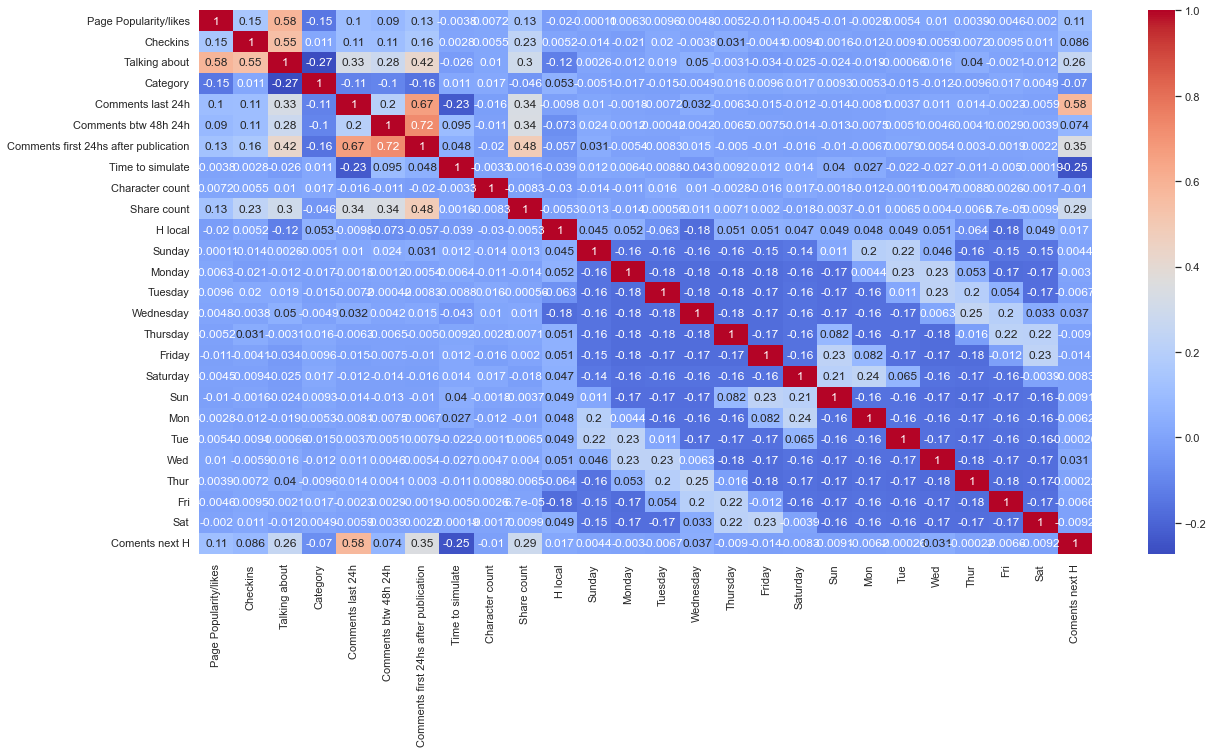

In [592]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(df_copy.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

Para predecir la variable target con un modelo de regresión lineal, nos interesa encontras las características que tienen una alta correlación con nuestra variable target y queremos borrar las variables que esten correlacionadas, buscamos independencia entre las variables predictoras. 

Analizando el mapa de calor, podemos ver que no tenemos altos valores de correlación entre variables predictoras y la target, lo cual ya nos da una idea de que podemos obtener resultados no tan buenos por este camino, pero igual intentaremos hacer la predicción con las variables que tienen un coeficiente de correlacion mas cercano a 1. Dejamos entonces por un lado entonces las variables predictoras y separamos la variable target.

In [488]:
x_= df_copy[["Talking about","Comments last 24h","Share count"]]

In [492]:
y_=df_copy[["Coments next H"]]

Hacmeos un scatterplot para ver como se comporta la variable objetivo con respecto a las variables predictoras. 

Text(0.5, 1.0, 'Variable target vs Share count')

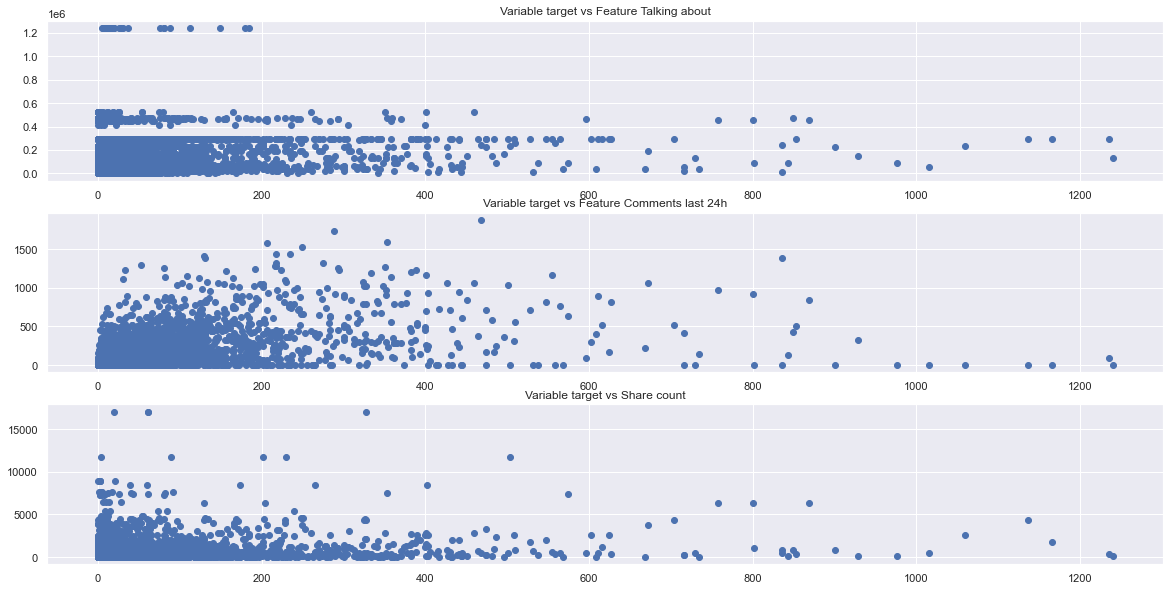

In [546]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1)
index=0
ax1.scatter(df_copy["Coments next H"],df_copy["Talking about"])
ax1.set_title("Variable target vs Feature Talking about")
ax2.scatter(df_copy["Coments next H"],df_copy["Comments last 24h"])
ax2.set_title("Variable target vs Feature Comments last 24h")
ax3.scatter(df_copy["Coments next H"],df_copy["Share count"])
ax3.set_title("Variable target vs Share count")

Vemos que la relación entre las variables predictoras y la objetivo en todos los casos no sigue una relacion muy lineal, pero con la que mejor correlacion tenemos es con la variable "Comments in last 24 hs"

Con este dataset resultante, aplicamos la funcion train_test_split para realizar la predicción.

In [493]:
X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.2, random_state=10)

Aplicamos la funcion LinearRegression de la libreria sklearn.

In [494]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [495]:
y_pred= lin_reg.predict(X_test)

In [496]:
e2_mLR= round(mean_squared_error(y_test, y_pred),3)
e2_mLR

1283.149

In [498]:
r_2=r2_score(y_test,y_pred)
print("Porcentaje de los datos explicados por el modelo:",round(r_2,3))

Porcentaje de los datos explicados por el modelo: 0.275


Como era de esperarse, obtenemos que un muy bajo porcentaje de los datos estan explicados por la variables predictoras, esto deriva un error de predicción grande y nos confirma que la regresión lineal no es un buen metodo para resolver este problema. De todas formas, a continuación implementaremos el modelo de regresión utilizando la técnica de regularizacion con Ridge y Lasso, para seleccionar las variables que mejor ayuden a predecir nuestro target y evaluaremos el error en comparacion de la predicción anterior, esperando ver una leve mejora en los resultados. 

Empezamos con el modelo de regularización Ridge Regression, este método no necesariamente elimina variables, si no que las hace mas pequeñas, menos representativas para el modelo.

In [567]:
y_=df_copy["Coments next H"]

In [549]:
x_=df_copy.drop(["Coments next H"],axis=1)

In [550]:
print("Tamaño de y",y_.shape)
print("Tamaño de x",x_.shape)

Tamaño de y (40000,)
Tamaño de x (40000, 25)


Vemos que tenemos 25 variables predictoras, a continuacion hacemos un plot de la variable target con cada una para ver un poco su relación.

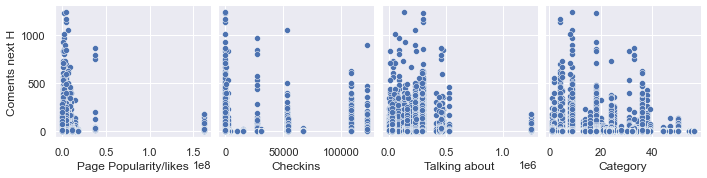

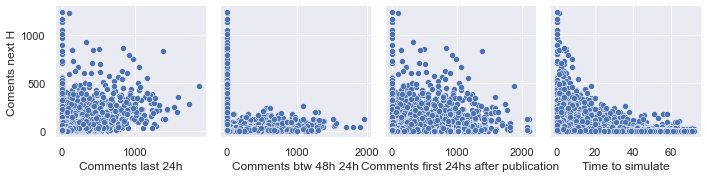

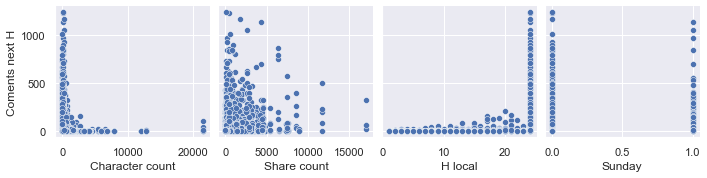

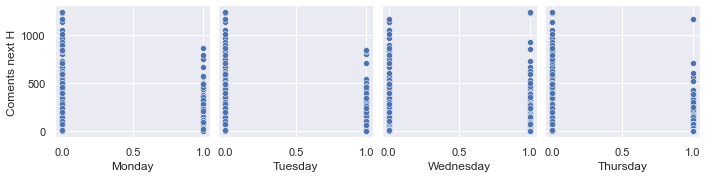

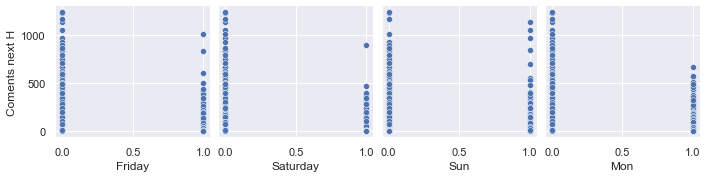

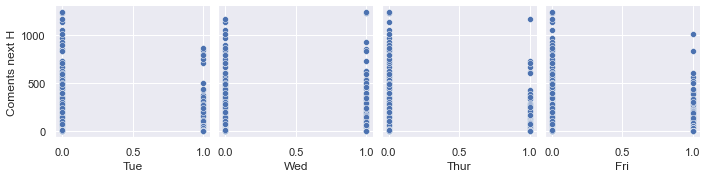

In [575]:
for i in [0,4,8,12,16,20]:
    sns.pairplot(data=df_copy,y_vars=["Coments next H"],x_vars=[df_copy.columns[i],df_copy.columns[i+1],df_copy.columns[i+2],df_copy.columns[i+3]])
plt.show()

Nuevamente, vemos que no hay una fuerte relacion lineal entre ninguna de las variables predictoras y la variable target, pero vamos a ver si nos podemos aproximar a su valor aplicando estos métodos.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.2, random_state=10)

Para comenzar generamos el vector de lambdas (el parametro de regularización) si es muy grande se penalizan los términos que complican la hipótesis.

In [511]:
lambdas=10**np.linspace(10,-2,100)*0.5

Armamos la matriz de coeficientes asociadas para cada variable independiente y para cada valor de lambda. 

In [512]:
ridge=Ridge(normalize=True)
coefs=[]
for k in lambdas:
    ridge.set_params(alpha=k)
    ridge.fit(X_train,y_train)
    coefs.append(ridge.coef_)
coefs=np.array(coefs).reshape(100,25)    

Esperamos que los coeficientes estimados se hagan mas pequeños para lambdas mas grandes.

Text(0, 0.5, 'beta')

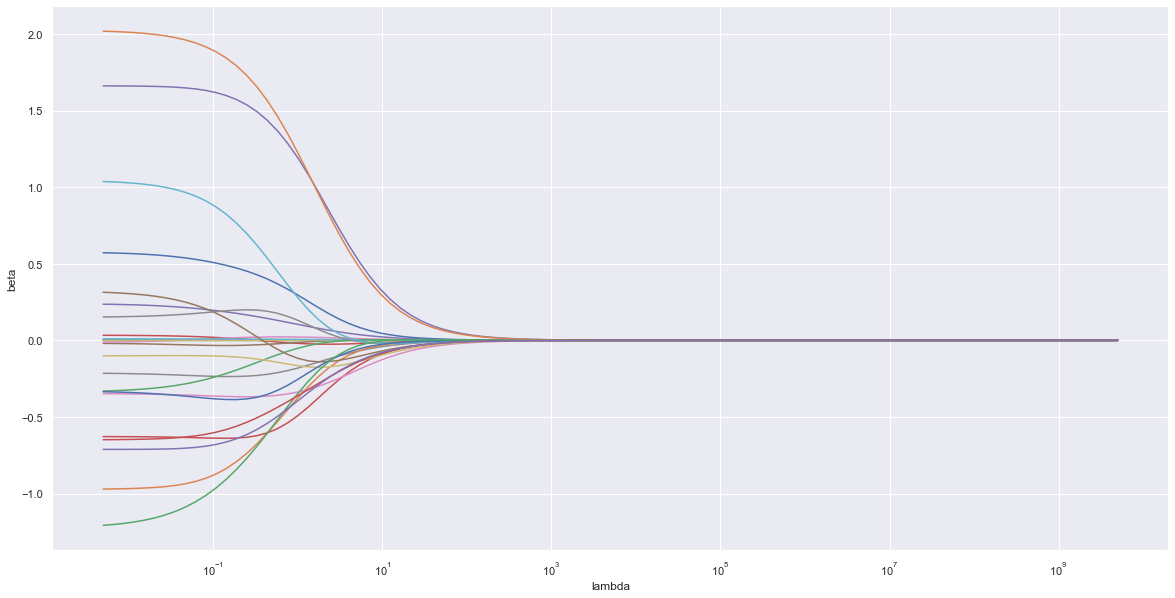

In [513]:
ax=plt.gca()
ax.plot(lambdas,coefs)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('beta')

Probamos con un valor de lambda igual a 5 y obtenemos el Beta para cada variable característica. 

In [514]:
mod_ridge5=Ridge(alpha=5,normalize=True)
mod_ridge5.fit(X_train,y_train)
print(pd.Series(np.array(mod_ridge5.coef_).reshape(-1,1).flatten(),index=x_.columns))

Page Popularity/likes                    9.127482e-08
Checkins                                 1.009769e-05
Talking about                            1.361510e-05
Category                                -2.131523e-02
Comments last 24h                        3.901285e-02
Comments btw 48h 24h                     7.721865e-04
Comments first 24hs after publication    1.164636e-02
Time to simulate                        -7.185744e-02
Character count                         -1.436621e-04
Share count                              3.095531e-03
H local                                  9.002876e-02
Sunday                                  -7.430207e-02
Monday                                   1.774797e-03
Tuesday                                 -1.710594e-01
Wednesday                                5.377635e-01
Thursday                                -1.069802e-01
Friday                                  -1.957104e-01
Saturday                                -6.065558e-03
Sun                         

Graficamos para ver mejor:

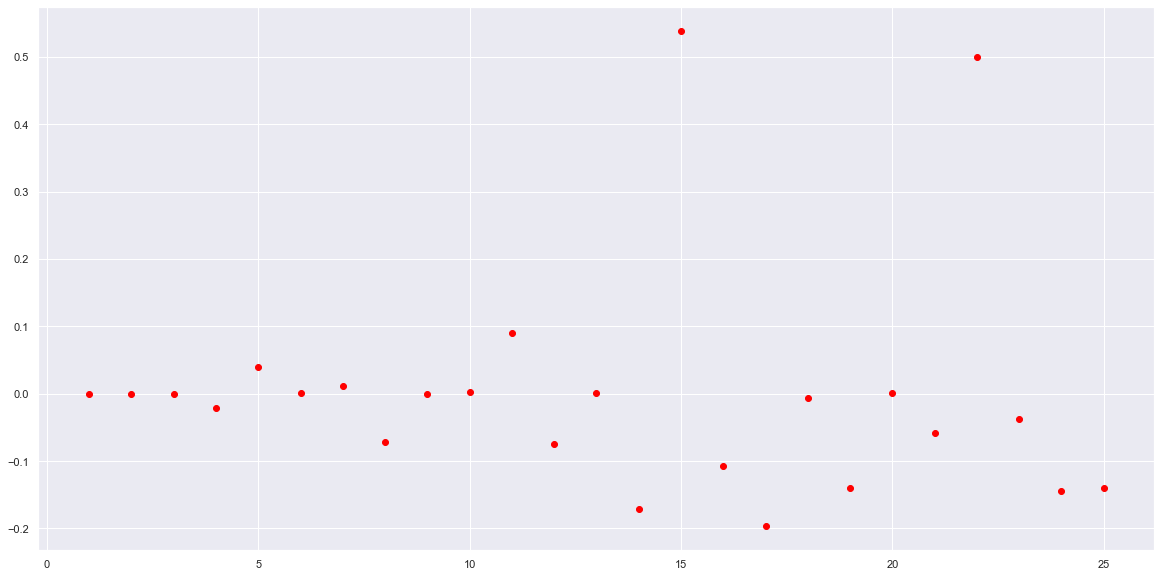

In [515]:
mod=np.array(mod_ridge5.coef_).reshape(-1,1).flatten()
eje_X=range(1,len(mod)+1,1)
plt.scatter(eje_X,mod,color='red')
plt.show()

Vemos que hay muchos valores cercanos al cero esto nos dice que hay muchas variables no representativas, que no nos van a ayudar a predecir nuestra variable target, de lo contrario, las variables que mas explican nuestro modelo son las que mas alejadas del cero se encuentran. Si están por debajo del cero significa que impactan negativamente a la variable objetivo. 

Luego del analisis realizado anteriormente, lo que esperabamos era que las variables que tengan un valor de beta alejado del cero, fueran las tres que elegimos anteriormente. Pero en este caso no es así, vemos que las variables que para el modelo mejor explican a la variable target son otras. Pienso que esto puede ser porque, al evaluar la correlación entre las variables predictoras, estas queden afuera por tener un alto coeficiente.

Realizamos la predicción:

In [516]:
y_pred=mod_ridge5.predict(X_test)

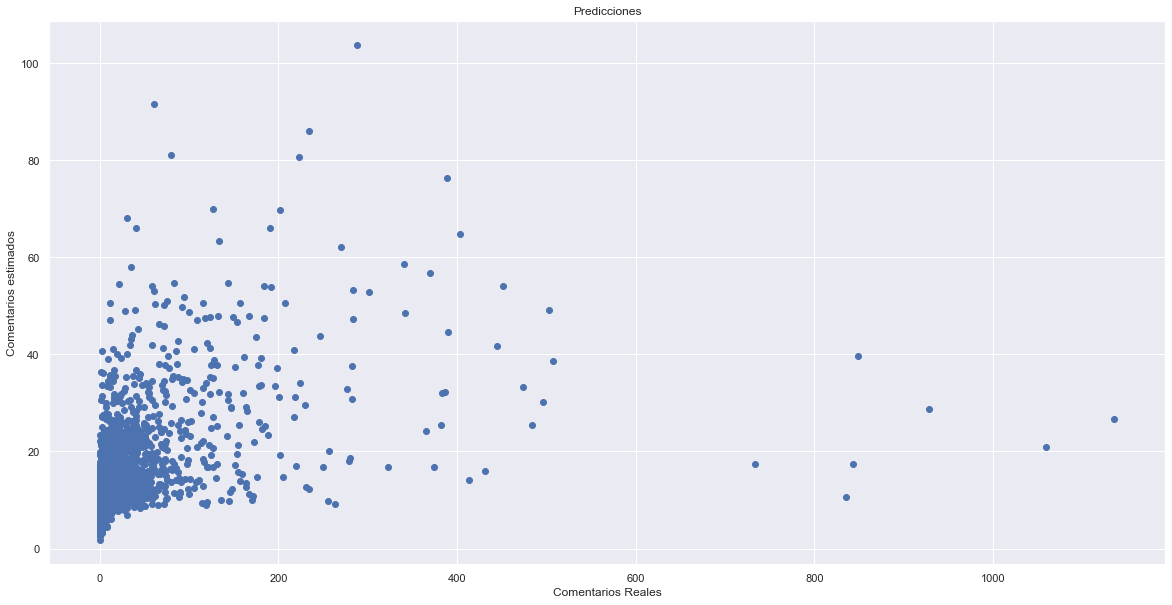

In [517]:
plt.scatter(y_test,y_pred)
plt.title("Predicciones")
plt.xlabel("Comentarios Reales")
plt.ylabel("Comentarios estimados")
plt.show()

Calculamos el error cuadrático medio cometido:

In [518]:
e2_m5 = round(mean_squared_error(y_test, y_pred),3)
e2_m5

1527.718

Hacemos la prueba para lamda=0, esto implica que no importa cuales sean los coeficientes de Beta, tenemos una regresion lineal, y la podemos comparar con la realizada anteriormente, donde hemos extraído las características a mano. 

In [520]:
mod_ridge0=Ridge(alpha=0,normalize=True)
mod_ridge0.fit(X_train,y_train)
print(pd.Series(np.array(mod_ridge0.coef_).reshape(-1,1).flatten(),index=x_.columns))

Page Popularity/likes                   -8.424998e-08
Checkins                                -7.323515e-05
Talking about                            5.187884e-05
Category                                 3.387557e-02
Comments last 24h                        2.396717e-01
Comments btw 48h 24h                    -1.785821e-02
Comments first 24hs after publication   -1.435333e-02
Time to simulate                        -2.125081e-01
Character count                         -3.713430e-04
Share count                              9.967055e-03
H local                                  5.773705e-01
Sunday                                  -9.732878e-01
Monday                                  -3.380418e-01
Tuesday                                 -6.277711e-01
Wednesday                                1.661988e+00
Thursday                                 3.228888e-01
Friday                                  -3.467261e-01
Saturday                                 1.500487e-01
Sun                         

In [521]:
y_pred=mod_ridge0.predict(X_test)

In [522]:
e2_m0 = round(mean_squared_error(y_test, y_pred),3)
e2_m0

1225.649

Vemos que el error cuadratico medio bajó con respecto a usar lambda=5.

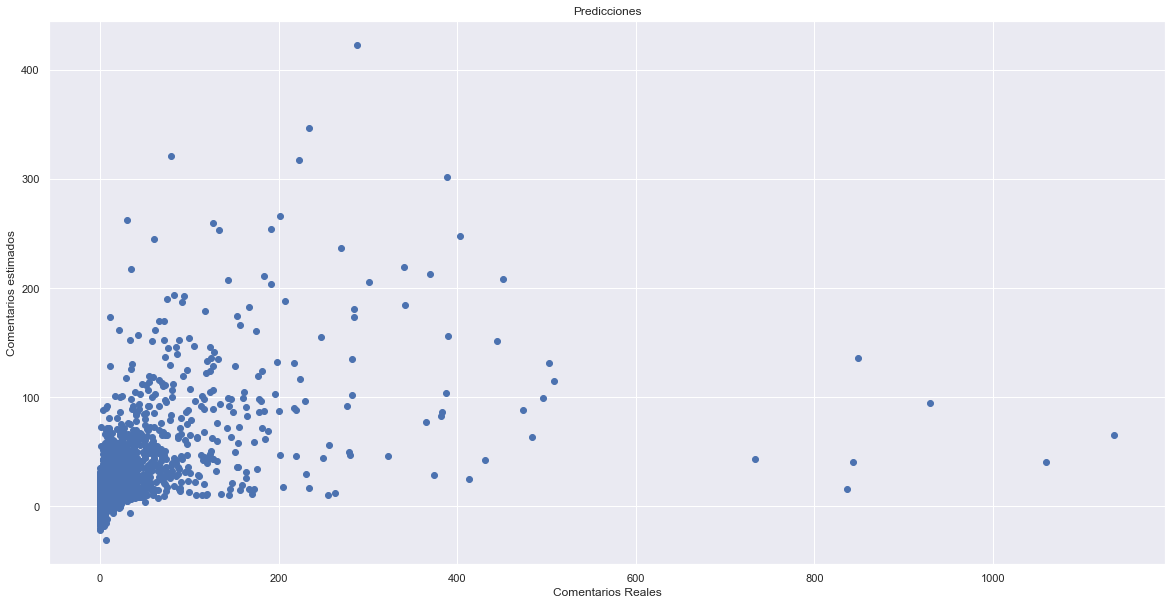

In [523]:
y_pred=mod_ridge0.predict(X_test)
plt.scatter(y_test,y_pred)
plt.title("Predicciones")
plt.xlabel("Comentarios Reales")
plt.ylabel("Comentarios estimados")
plt.show()

Ahora vamos a utilizamos cross-validation para obtener el parametro lambda, para hacer mas eficiente la elección, y no tener que estar probando para todos los valores e ir comparando los resultados.

In [524]:
ridgecv=RidgeCV(alphas=lambdas,scoring='neg_mean_squared_error',normalize=True)
ridgecv.fit(X_train,y_train)
print("El valor de lambda encontrado con CV",round(ridgecv.alpha_,3))

El valor de lambda encontrado con CV 0.005


Este resultado tiene sentido, ya que vimos que tomando un lambda=0 obtuvimos menor error que con un lambda=5. Ahora probamos con ese valor.

In [525]:
mod_ridgeCV=Ridge(alpha=0.005,normalize=True)
mod_ridgeCV.fit(X_train,y_train)
print(pd.Series(np.array(mod_ridgeCV.coef_).reshape(-1,1).flatten(),index=x_.columns))


Page Popularity/likes                   -7.561049e-08
Checkins                                -7.144359e-05
Talking about                            5.097541e-05
Category                                 3.306223e-02
Comments last 24h                        2.361472e-01
Comments btw 48h 24h                    -1.983738e-02
Comments first 24hs after publication   -1.183401e-02
Time to simulate                        -2.150386e-01
Character count                         -3.689072e-04
Share count                              9.887953e-03
H local                                  5.721528e-01
Sunday                                  -9.708990e-01
Monday                                  -3.309973e-01
Tuesday                                 -6.283476e-01
Wednesday                                1.661476e+00
Thursday                                 3.140195e-01
Friday                                  -3.482041e-01
Saturday                                 1.526898e-01
Sun                         

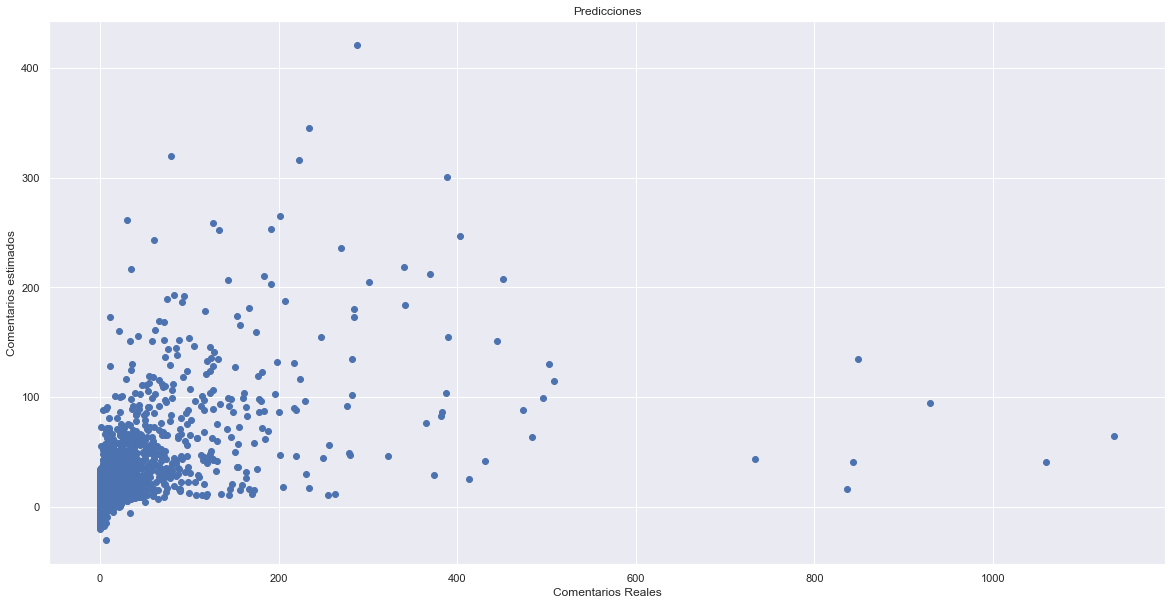

In [526]:
y_pred=mod_ridgeCV.predict(X_test)
plt.scatter(y_test,y_pred)
plt.title("Predicciones")
plt.xlabel("Comentarios Reales")
plt.ylabel("Comentarios estimados")
plt.show()

In [527]:
y_pred=mod_ridgeCV.predict(X_test)

In [528]:
e2_mCV = round(mean_squared_error(y_test, y_pred),3)
e2_mCV

1225.527

Vemos los errores cometidos con distintos los distintos valores:

In [529]:
print("El ECM con Lambda=5", e2_m5)
print("El ECM con Lambda=0", e2_m0)
print("El ECM con Lambda=CV", e2_mCV)

El ECM con Lambda=5 1527.718
El ECM con Lambda=0 1225.649
El ECM con Lambda=CV 1225.527


No hay casi diferencia entre los últimos ya que el lambda estimado por cross-validation dio muy cercano a cero, vamos a ver los resultados obtenidos en la prediccion utilizando el último modelo. También, si comparamos con el primer modelo de regresion planeteado habiamos obtenido un error de 1283, por lo cual vemos una leve mejora con la regularización. 

A continuación visualizamos un poco los errores utilizando la predicción con el último lambda y sacamos conclusiones:

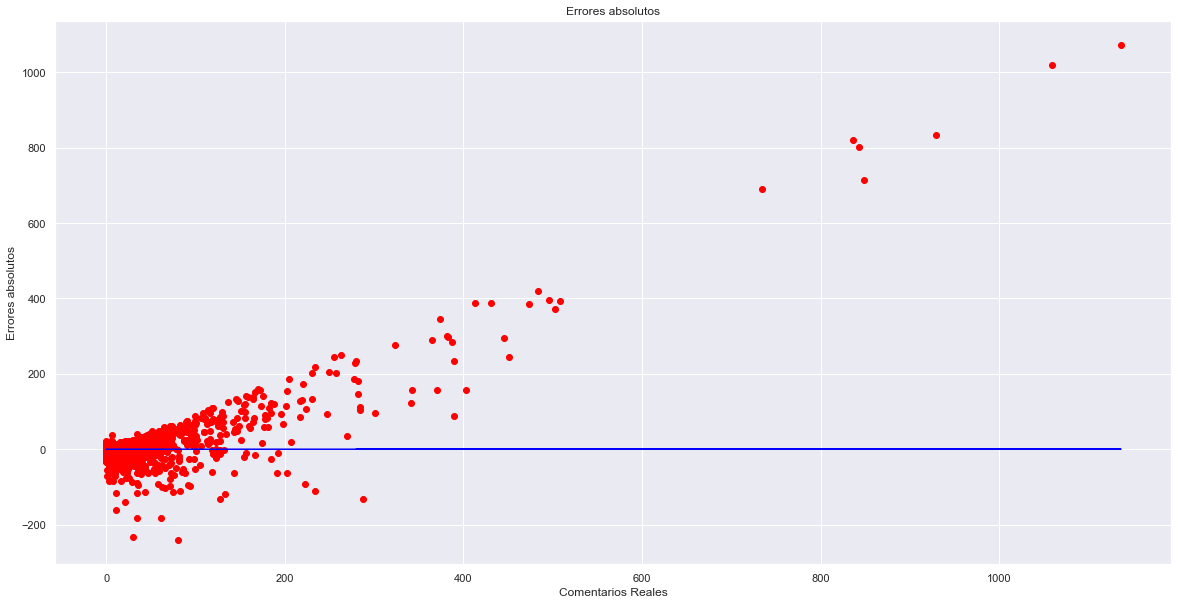

In [576]:
err_abs=y_test-y_pred
plt.scatter(y_test,err_abs,color='red')
plt.plot(y_test,np.zeros(len(err_abs)),color='blue')
plt.title('Errores absolutos')
plt.xlabel("Comentarios Reales")
plt.ylabel("Errores absolutos")
plt.show()

Buscaríamos que los errores esten cercanos a la linea azul que es el cero, y vemos que tenemos valores muy alejados, por lo tanto mucho error.

Visualizamos los primeros 200 valores estimados VS los reales

(8000, 1)
(8000, 1)


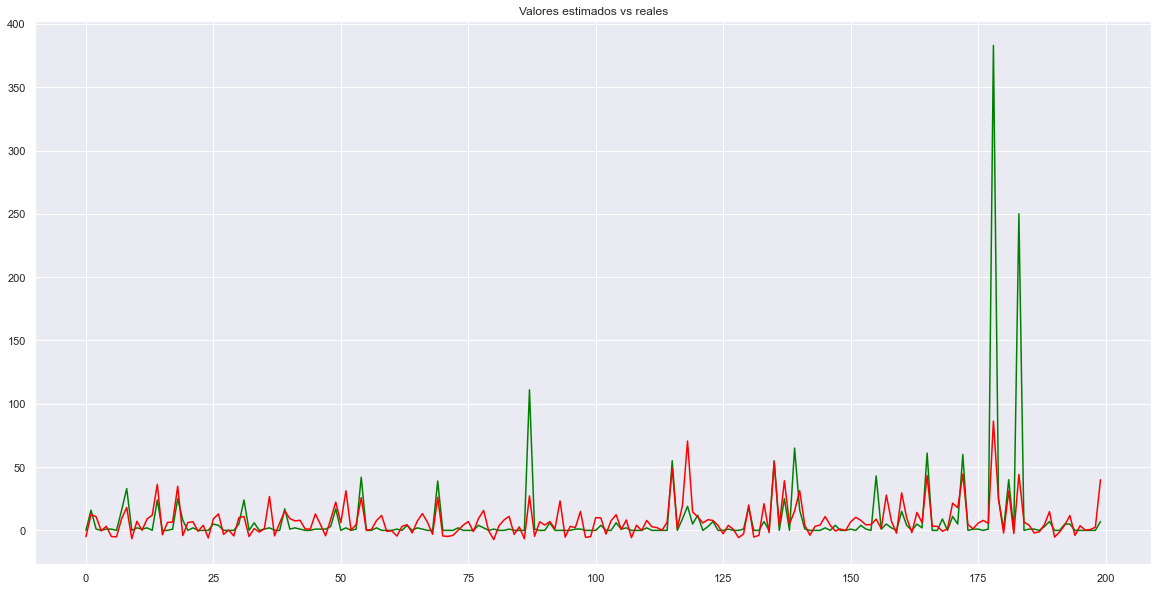

In [578]:
y_pred = np.array(y_pred)
print(np.shape(y_pred.reshape(-1, 1)))
y_test = np.array(y_test)
print(np.shape(y_test.reshape(-1, 1)))
eje_x=range(0,200)
plt.plot(eje_x,y_test[:200],color='green')
plt.plot(eje_x,y_pred[:200],color='red')
plt.title("Valores estimados vs reales")
plt.show()


Vemos que tiene mas o menos el mismo comportamiento, pero no tiene los picos reales del modelo.

In [499]:
r_2=r2_score(y_test,y_pred)
n=len(y_train)
p=X_train.shape[1]
r_cuad_aj=1-(((1-r_2)*(n-1))/(n-p-1))
print("Porcentaje de los datos explicados por el modelo:",round(r_2,3))
print("n:",n)
print("p:",p)
print("R_2_ajustada:",round(r_cuad_aj,3))

Porcentaje de los datos explicados por el modelo: 0.275
n: 32000
p: 3
R_2_ajustada: 0.275


Tenemos un bajo porcentaje de r2, lo cual nos dice que la mayoria de las variables utilizadas para la predicción no eran significativas, no aportaban información útil. 
Estos resultados nos dicen que Ridge Regression no es un modelo adecuado para esta base de datos. 

Ahora haremos el analisis utilizando Lasso y evaluaremos la performance de este método de regularización y compararemos resultados con Ridge.

In [465]:
lasso=Lasso(max_iter=100000,normalize=True)
coefs=[]
for k in lambdas:
    lasso.set_params(alpha=k)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

print(np.shape(coefs))

(100, 25)


Text(0, 0.5, 'beta')

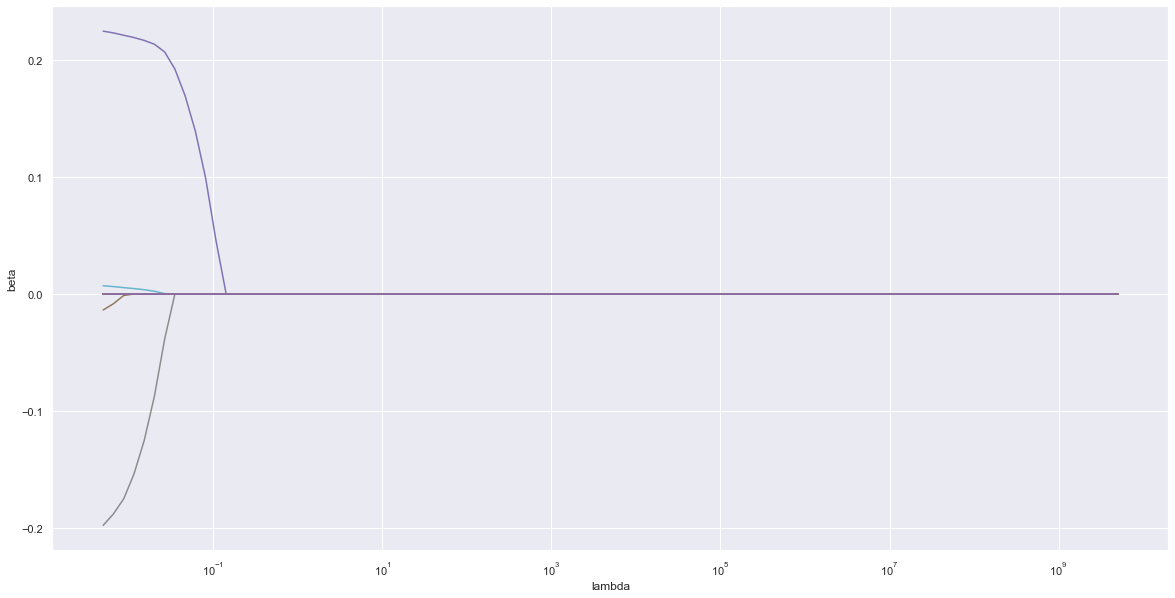

In [466]:
ax=plt.gca()
ax.plot(lambdas,coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('beta')

Obtenemos lambda directamente por Cross-validation

In [467]:
lassocv=LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
lassocv.fit(X_train,y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [468]:
print(pd.Series(np.array(lassocv.coef_).reshape(-1,1).flatten(),index=x_.columns))

Page Popularity/likes                   -6.106447e-08
Checkins                                -6.878633e-05
Talking about                            4.962312e-05
Category                                 2.990861e-02
Comments last 24h                        2.384915e-01
Comments btw 48h 24h                    -1.853347e-02
Comments first 24hs after publication   -1.295120e-02
Time to simulate                        -2.128382e-01
Character count                         -3.001533e-04
Share count                              9.833538e-03
H local                                  5.570427e-01
Sunday                                  -5.106870e-01
Monday                                  -0.000000e+00
Tuesday                                 -3.119636e-01
Wednesday                                1.779606e+00
Thursday                                 4.391722e-01
Friday                                  -8.192046e-03
Saturday                                 4.262346e-01
Sun                         

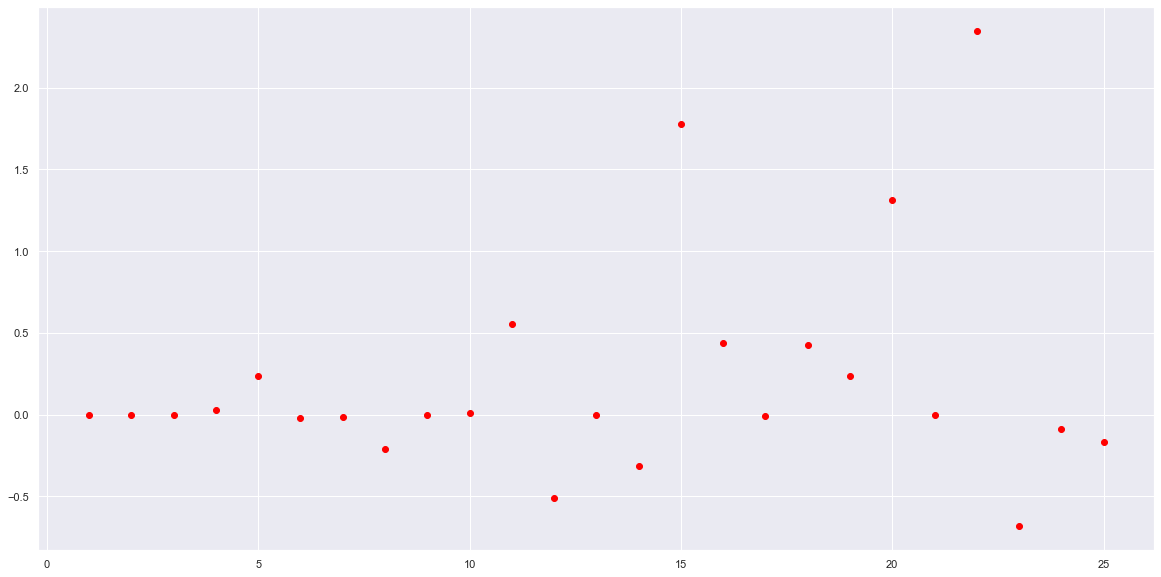

In [469]:
mod=np.array(lassocv.coef_).reshape(-1,1).flatten()
eje_X=range(1,len(mod)+1,1)
plt.scatter(eje_X,mod,color='red')
plt.show()

Aca tambien vemos que las variables con mayor peso son diferentes a las seleccionadas por el método Ridge. 

In [479]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
print("Valor de lambda obtenido en por cross validation:", round(lassocv.alpha_,4))

Valor de lambda obtenido en por cross validation: 0.0002


In [480]:
r_2=r2_score(y_test,y_pred)
n=len(y_train)
p=X_train.shape[1]
r_cuad_aj=1-(((1-r_2)*(n-1))/(n-p-1))
print("Porcentaje de los datos explicados por el modelo:",round(r_2,3))
print("n:",n)
print("p:",p)
print("R_2_ajustada:",round(r_cuad_aj,3))

Porcentaje de los datos explicados por el modelo: 0.308
n: 32000
p: 25
R_2_ajustada: 0.307


Los valores no mejoraron con respecto al modelo anterior, por lo cual concluimos que Lasso tampoco es un buen modelo para resolver esta predicción. Para resolver este problema, de entrada ya viendo la matriz de correlación y las gráficas de distribucion de las variables optaría por otro tipo de modelos de regresion, como árboles de decisión o bosques aleatorios.  